In [155]:
import pandas as pd
df = pd.read_csv("mini_sales_100.csv")
df.head()

,order_id,customer,city,category,price,quantity,order_date,rating
0,201,Ali,Srinagar,Electronics,45000,1.0,2025-01-01,4.5
1,202,Ayaan,Pampore,Clothing,1200,2.0,2025-01-02,4.0
2,203,Zara,Srinagar,Books,450,3.0,2025-01-03,3.8
3,204,Huzaifa,Anantnag,Electronics,52000,1.0,2025-01-04,4.7
4,205,Sana,Pulwama,Clothing,1500,NaN,2025-01-05,4.1


In [156]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    110 non-null    int64  
 1   customer    110 non-null    str    
 2   city        110 non-null    str    
 3   category    110 non-null    str    
 4   price       110 non-null    int64  
 5   quantity    108 non-null    float64
 6   order_date  110 non-null    str    
 7   rating      105 non-null    float64
dtypes: float64(2), int64(2), str(4)
memory usage: 7.0 KB


In [157]:
# Convert date column as its type is str
df["order_date"] = pd.to_datetime(df["order_date"])

In [158]:
df.tail()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    110 non-null    int64         
 1   customer    110 non-null    str           
 2   city        110 non-null    str           
 3   category    110 non-null    str           
 4   price       110 non-null    int64         
 5   quantity    108 non-null    float64       
 6   order_date  110 non-null    datetime64[us]
 7   rating      105 non-null    float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(3)
memory usage: 7.0 KB


In [159]:
import sqlite3

conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

query = """
SELECT category, SUM(price * quantity) AS total_sales
FROM sales
GROUP BY category;
"""

result = pd.read_sql(query, conn)
print(result)

      category  total_sales
0        Books      27955.0
1     Clothing    1229649.0
2  Electronics    2151000.0
3    Groceries     112390.0


In [160]:
import requests

url = "http://127.0.0.1:5000/sales"
response = requests.get(url)

data = response.json()
df2 = pd.DataFrame(data)

df2.head()

,category,city,customer,order_date,order_id,price,quantity,rating
0,Electronics,Srinagar,Ali,2025-01-01 00:00:00,201,45000,1.0,4.5
1,Clothing,Pampore,Ayaan,2025-01-02 00:00:00,202,1200,2.0,4.0
2,Books,Srinagar,Zara,2025-01-03 00:00:00,203,450,3.0,3.8
3,Electronics,Anantnag,Huzaifa,2025-01-04 00:00:00,204,52000,1.0,4.7
4,Clothing,Pulwama,Sana,2025-01-05 00:00:00,205,1500,NaN,4.1


In [161]:
# Check missing values
missing = df.isnull().sum()
print(missing)
# Fill missing values
df["quantity"]= df["quantity"].fillna(df["quantity"].median())
df["rating"]= df["rating"].fillna(df["rating"].mean())


order_id      0
customer      0
city          0
category      0
price         0
quantity      2
order_date    0
rating        5
dtype: int64


In [162]:
df = pd.read_csv("mini_sales_100.csv")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower) | (df["price"] > upper)]
outliers


,order_id,customer,city,category,price,quantity,order_date,rating
100,301,Ayaan,Srinagar,Electronics,250000,1.0,2025-04-12,4.8
104,305,Imran,Srinagar,Electronics,300000,1.0,2025-04-16,4.9
108,309,Hamza,Srinagar,Electronics,180000,2.0,2025-04-20,4.6


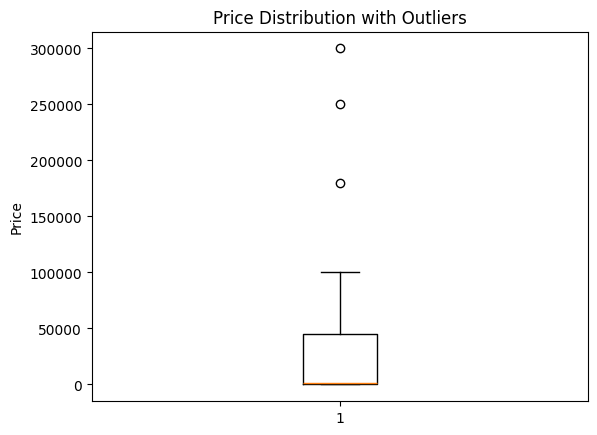

In [163]:
import matplotlib.pyplot as plt

# Box plot for price
plt.figure()
plt.boxplot(df["price"])
plt.title("Price Distribution with Outliers")
plt.ylabel("Price")
plt.show()

In [164]:
df_clean = df[(df["price"] >= lower) & (df["price"] <= upper)]
df_clean.to_csv("mini_sales_clean.csv", index=False)


In [165]:
df_clean.info()
df_clean.describe()

<class 'pandas.DataFrame'>
Index: 107 entries, 0 to 109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    107 non-null    int64  
 1   customer    107 non-null    str    
 2   city        107 non-null    str    
 3   category    107 non-null    str    
 4   price       107 non-null    int64  
 5   quantity    105 non-null    float64
 6   order_date  107 non-null    str    
 7   rating      102 non-null    float64
dtypes: float64(2), int64(2), str(4)
memory usage: 7.5 KB


,order_id,price,quantity,rating
count,107.000000,107.000000,105.000000,102.000000
mean,254.112150,13796.579439,2.847619,3.883333
std,31.220254,21787.966402,6.065002,0.594876
min,201.000000,5.000000,1.000000,1.000000
25%,227.500000,605.000000,1.000000,3.625000
50%,254.000000,1190.000000,2.000000,4.000000
75%,280.500000,34000.000000,3.000000,4.200000
max,310.000000,99999.000000,50.000000,4.700000


In [166]:
# Ensure order_date is datetime
df_clean["order_date"] = pd.to_datetime(df_clean["order_date"])

In [167]:
df_clean["total"] = df_clean["price"]*df_clean["quantity"]
# Create month column
df_clean["orders_monthly"] = df_clean["order_date"].dt.to_period("M")
df = df_clean

In [168]:
# 1) Sales by Category
sales_by_category = df_clean.groupby("category")["total"].sum()
print(sales_by_category)

# 2) Average Rating by City
avg_rating_city = df_clean.groupby("city")["rating"].mean()
print(avg_rating_city)

# 3) Orders Over Time
orders_monthly = df_clean.groupby("orders_monthly")["quantity"].sum()
print(orders_monthly.head())

# 4) Top 5 Customers by Spend
top_customers = df_clean.groupby("customer")["total"].sum().sort_values(ascending=False).head()
print(top_customers)

category
Books            27955.0
Clothing       1229649.0
Electronics    1241000.0
Groceries       112390.0
Name: total, dtype: float64
city
Anantnag    3.628000
Pampore     4.057692
Pulwama     3.904348
Srinagar    3.932143
Name: rating, dtype: float64
orders_monthly
2025-01     61.0
2025-02     57.0
2025-03     66.0
2025-04    115.0
Freq: M, Name: quantity, dtype: float64
customer
Rida       600000.0
Zoya       477620.0
Faisal     109999.0
Areeba      75500.0
Huzaifa     52000.0
Name: total, dtype: float64


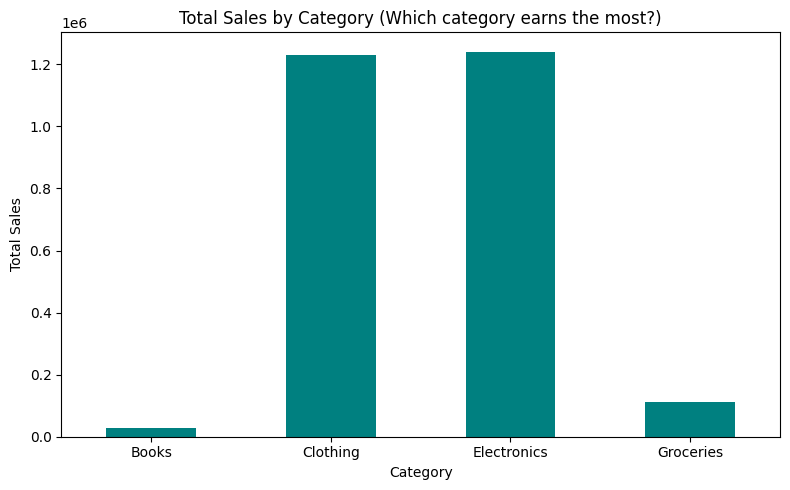

In [169]:
plt.figure(figsize=(8,5))
sales_by_category.plot(kind="bar", color="teal")
plt.title("Total Sales by Category (Which category earns the most?)")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


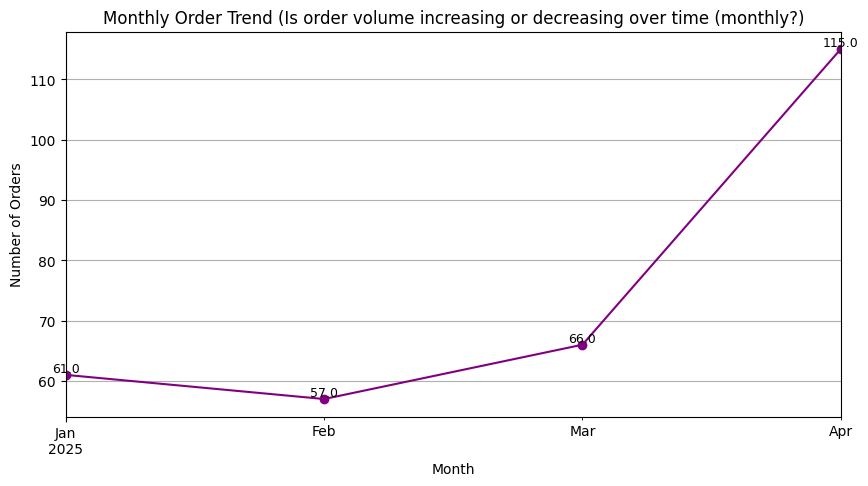

In [170]:
plt.figure(figsize=(10
,5))
ax = orders_monthly.plot(marker="o", color="purple")

plt.title("Monthly Order Trend (Is order volume increasing or decreasing over time (monthly?)")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)


# Add value labels on each point
for x, y in zip(orders_monthly.index.astype(str), orders_monthly.values):
    ax.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

plt.show()


In [171]:
df_clean["orders_monthly"].unique()

<PeriodArray>
['2025-01', '2025-02', '2025-03', '2025-04']
Length: 4, dtype: period[M]

In [172]:
# Create a mapping of categories to product names
product_map = {
    "Electronics": ["Laptop", "Smartphone", "Headphones", "Tablet"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Sweater"],
    "Books": ["Novel", "Textbook", "Comics", "Biography"],
    "Groceries": ["Rice", "Oil", "Milk", "Fruits"]
}

import numpy as np

# Add product_name column based on category
df["product_name"] = df["category"].apply(lambda x: np.random.choice(product_map[x]))

df_clean = df


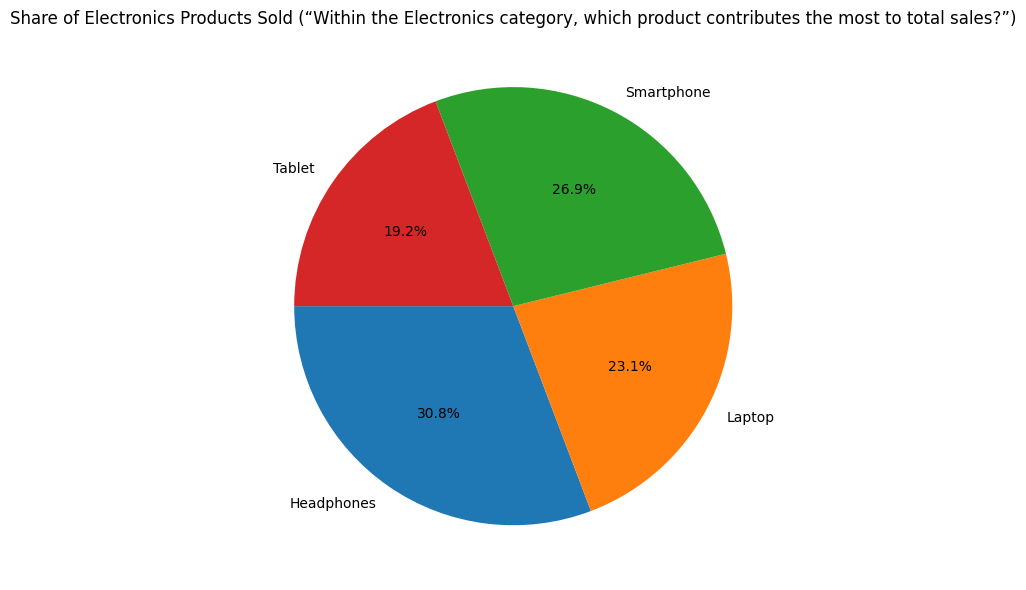

In [173]:
# Filter only Electronics
electronics_df = df_clean[df_clean["category"] == "Electronics"]
electronics_df.head()
# Total quantity sold per product in Electronics
electronics_products = electronics_df.groupby("product_name")["quantity"].sum()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(electronics_products, labels=electronics_products.index, autopct="%1.1f%%", startangle=180)
plt.title("Share of Electronics Products Sold (“Within the Electronics category, which product contributes the most to total sales?”)")
plt.tight_layout()
plt.show()


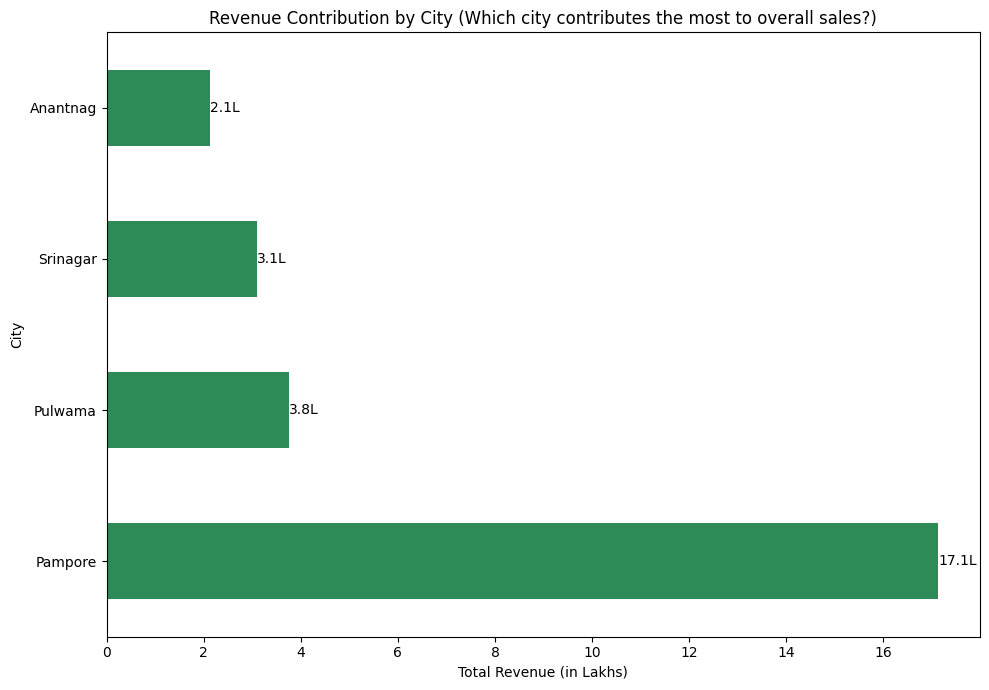

In [174]:
city_revenue_lakh = city_revenue / 1e5  # convert to Lakhs

plt.figure(figsize=(10,7))
ax = city_revenue_lakh.plot(kind="barh", color="seagreen")

plt.title("Revenue Contribution by City (Which city contributes the most to overall sales?)")
plt.xlabel("Total Revenue (in Lakhs)")
plt.ylabel("City")
plt.tight_layout()

# Add labels
for i, v in enumerate(city_revenue_lakh.values):
    ax.text(v, i, f"{v:.1f}L", va="center")

plt.show()



             price  quantity    rating     total
price     1.000000 -0.114568  0.325989  0.275165
quantity -0.114568  1.000000 -0.012769  0.886062
rating    0.325989 -0.012769  1.000000  0.115678
total     0.275165  0.886062  0.115678  1.000000


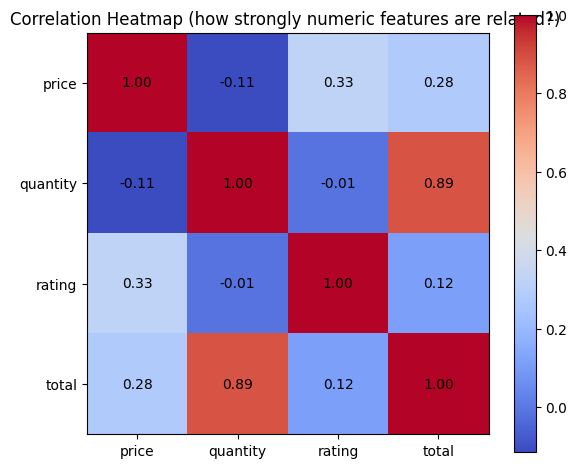

In [175]:
# Select only numeric columns
num_df = df_clean[["price", "quantity", "rating", "total"]]

# Correlation matrix
corr = num_df.corr()
print(corr)
# Plot heatmap
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add values inside cells
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", 
                 ha="center", va="center", color="black")

plt.title("Correlation Heatmap (how strongly numeric features are related?) ")
plt.tight_layout()
plt.show()


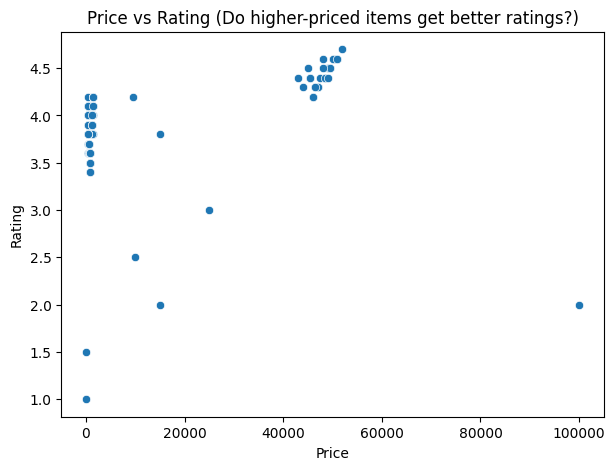

In [176]:
import seaborn as sns 
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_clean, x="price", y="rating")
plt.title("Price vs Rating (Do higher-priced items get better ratings?)")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()


NameError: name 'ss' is not defined